# Collocation and Interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### The Collocation Problem:
* Determine $c_k$ such that $$\sum_{k=0}^n c_k\varphi_k(x) = f(x)$$
* The independent variable will get discretized into a grid, $\{x_j\}_{j=0}^n$, which converts the problem to a discrete form $$\sum_{k=0}^n c_k\varphi_k(x_j) = f(x_j)$$ for each $j = 0,1,\ldots,n$
* Which we will typically write as $$\sum_{k=0}^n c_k\varphi_{jk} = f_j$$

### Vectorization for Solving the Collocation Problem

###### The sum $$\sum_{k=0}^n c_k\varphi_{jk} = f_j$$ can be written in terms of vector-matrix multiplication:

$$\begin{pmatrix}
\varphi_0(x_0) & \varphi_1(x_0) &\ldots & \varphi_n(x_0)\\
\varphi_0(x_1) & \varphi_1(x_1) &\ldots & \varphi_n(x_1)\\
\varphi_0(x_2) & \varphi_1(x_2) &\ldots & \varphi_n(x_2)\\
\vdots & \vdots & \ddots & \vdots \\
\varphi_0(x_n) & \varphi_1(x_n) &\ldots & \varphi_n(x_n)\\
\end{pmatrix}
\begin{pmatrix}
c_0\\
c_1\\
c_2\\
\vdots\\
c_n
\end{pmatrix}
=
\begin{pmatrix}
f_0\\
f_1\\
f_2\\
\vdots\\
f_n
\end{pmatrix}$$

###### A short interlude on the outer product and broadcasting

###### The outer product of two vectors is defined $$a\otimes b=ab^T$$
Recall that we always assume that vectors are column vectors.

In [2]:
a = np.arange(-3,4)
b = np.ones((1,5))
print(f'a = {a}')
print(f'b = {b}')
oab = np.outer(a,b)
print(f'out(a,b) = \n{oab}')

a = [-3 -2 -1  0  1  2  3]
b = [[1. 1. 1. 1. 1.]]
out(a,b) = 
[[-3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]]


In [3]:
x = np.linspace(0,10,11)
u = np.ones((1,5))
print(f'x = {x}')
print(f'u = {u}')
X = np.outer(u,x)
print(f'out(u,x) = \n{X}')
X = np.outer(x,u)
print(f'out(x,u) = \n{X}')
#X**np.arange(5)

x = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
u = [[1. 1. 1. 1. 1.]]
out(u,x) = 
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]
out(x,u) = 
[[ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]


###### Example (Vandermonde Matrix $[x_j^k]_{j=0,k=0}^{n,m}$ for a 5th degree polynomial:
$$p(x_j) = a_0x_j^0 + a_1x_j^1 + a_2x_j^2 + a_3x_j^3 + a_4x_j^4 + a_5x_j^5$$

In [4]:
x = np.linspace(2,6,5)
u = np.ones((1,6))
X = np.outer(x,u)
k = np.arange(6)
np.set_printoptions(suppress=True)
print(f'{X**k}')

[[   1.    2.    4.    8.   16.   32.]
 [   1.    3.    9.   27.   81.  243.]
 [   1.    4.   16.   64.  256. 1024.]
 [   1.    5.   25.  125.  625. 3125.]
 [   1.    6.   36.  216. 1296. 7776.]]


###### Of course NumPy has a function for just such an occasion!

In [5]:
np.vander(x)

array([[  16.,    8.,    4.,    2.,    1.],
       [  81.,   27.,    9.,    3.,    1.],
       [ 256.,   64.,   16.,    4.,    1.],
       [ 625.,  125.,   25.,    5.,    1.],
       [1296.,  216.,   36.,    6.,    1.]])

In [6]:
np.vander(x,increasing=True)

array([[   1.,    2.,    4.,    8.,   16.],
       [   1.,    3.,    9.,   27.,   81.],
       [   1.,    4.,   16.,   64.,  256.],
       [   1.,    5.,   25.,  125.,  625.],
       [   1.,    6.,   36.,  216., 1296.]])

In [7]:
np.vander(x,N=6,increasing=True)

array([[   1.,    2.,    4.,    8.,   16.,   32.],
       [   1.,    3.,    9.,   27.,   81.,  243.],
       [   1.,    4.,   16.,   64.,  256., 1024.],
       [   1.,    5.,   25.,  125.,  625., 3125.],
       [   1.,    6.,   36.,  216., 1296., 7776.]])

### Polynomial Interpolation: $\varphi_k(x) = x^k$ on $[-2,2]$

###### The sum $$\sum_{k=0}^n c_k\varphi_{jk} = f_j\implies \sum_{k=0}^n c_kx_j^k = f_j$$ can be written in terms of vector-matrix multiplication:

$$\begin{pmatrix}
1 & x_0 & x_0^2 & \ldots & x_0^n\\
1 & x_1 & x_1^2 & \ldots & x_1^n\\
1 & x_2 & x_2^2 & \ldots & x_2^n\\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \ldots & x_n^n\\
\end{pmatrix}
\begin{pmatrix}
c_0\\
c_1\\
c_2\\
\vdots\\
c_n
\end{pmatrix}
=
\begin{pmatrix}
f_0\\
f_1\\
f_2\\
\vdots\\
f_n
\end{pmatrix}$$

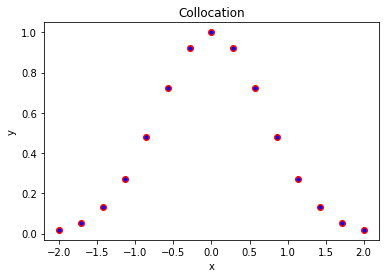

In [8]:
# Set up the spatial grid, frequency grid, grid-matrix, and frequency-matrix
x = np.linspace(-2,2,15) #<-- Play with the number of nodes, start with 3, 5, ...
# Test Function to be Replicated
f = np.exp(-x**2)
# Basis Function (degree matches number of grid points in this case)
nodes = 15
phi = np.vander(x,N=nodes,increasing=True)
# **************************************************************************************************
# Determine the basis function coefficients by solving the collocation problem
# **************************************************************************************************
# The coefficients determine the interpolant, they get recycled for remaining interpolation problems
# **************************************************************************************************
c = np.linalg.solve(phi,f)
plt.plot(x,np.dot(phi,c),'ro',x,f,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Collocation');

### Interpolation

The shape of phi is (9, 15)


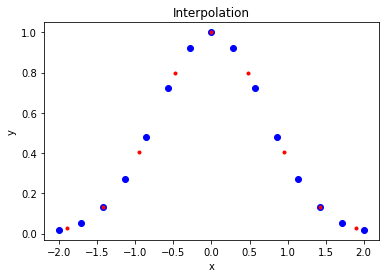

In [9]:
# Construct interpolation grid
xi = np.linspace(-1.9,1.9,9)
# Interpolation grid has 9 points but there are as many basis functions as there are degrees
# Construct basis functions with evaluation grid, that is, evaluate the basis functions
phi = np.vander(xi,N=nodes,increasing=True) # N is the degree (number of nodes) from the collocation problem
print('The shape of phi is {}'.format(phi.shape))
yi = np.dot(phi,c) #<-- Notice recycled coefficients c_k's
plt.plot(x,f,'bo',xi,yi,'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation');

The shape of phi is (1, 15)
The interpolated point is ([0.9856],0.38)


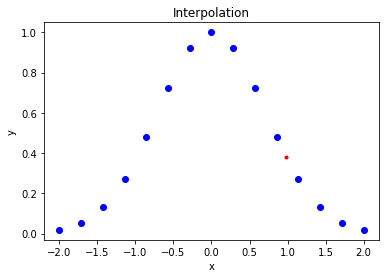

In [10]:
# Construct interpolation grid
xi = [0.9856] # vander only accepts arrays
# Interpolation grid has 1 point but there are as many basis functions as there are degrees
# Construct basis functions with evaluation grid, that is, evaluate the basis functions
phi = np.vander(xi,N=nodes,increasing=True)
print('The shape of phi is {}'.format(phi.shape))
yi = phi.dot(c) #<-- Notice recycled coefficients c_k's
plt.plot(x,f,'bo',xi,yi,'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation');
print('The interpolated point is ({},{:1.2f})'.format(xi,yi[0]))

-[back to top](#Collocation-and-Interpolation)

### Exercises

###### Use collocation with monomial basis functions and the given data $y$ on the interval $[-1,2.2]$ to interpolate $\hat{y}$ on $[-0.8,2.05]$ with 47 interpolation values. You may assume evenly-spaced nodes. It is up to you to figure out the information needed to complete this problem.

In [27]:
y = np.array([-0.57079633, -0.99815141, -1.17451768, -1.19526364, -1.07448061,
       -0.73865211, -0.08574222,  0.74636778,  1.1470214 ,  0.69911435,
       -0.13568609, -0.76823448, -1.08716558, -1.19780524, -1.16868353,
       -0.98008756, -0.53315363,  0.22920113])

Text(0, 0.5, 'y')

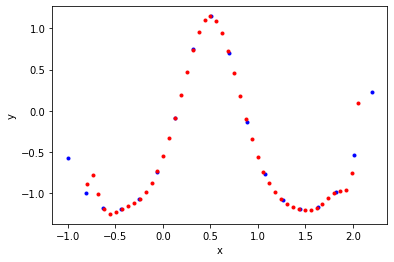

In [37]:
# insert code here
# plot the interpolating polynomial against the data
x = np.linspace(-1,2.2,len(y)) #<-- Play with the number of nodes, start with 3, 5, ...
xi = np.linspace(-0.8,2.05,47)
phi = np.vander(x,increasing=True)
c = np.linalg.solve(phi,y)
Xi = np.vander(xi,N=len(y),increasing = True) #Length(Interpolation Values) by Length(nodes)
yi = np.dot(Xi,c)

plt.plot(x,y,'b.',xi,yi,'r.')
plt.xlabel('x')
plt.ylabel('y')

###### See if the Lagrange interpolating polynomial yields a better (qualitatively speaking) result.

In [15]:
# insert code here
# plot the interpolating polynomial against the data
from scipy.interpolate import barycentric_interpolate as pn

-[back to top](#Collocation-and-Interpolation)